In [1]:
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
#from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-05-13 00:39:42.595365: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-13 00:39:42.595494: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-13 00:39:42.723503: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
datacol_path= '/kaggle/input/plantvillage-dataset/color'

train_ds = keras.utils.image_dataset_from_directory(
    datacol_path,
    image_size=(224, 224),
    batch_size=16,
    seed=123,
    validation_split=0.3,  # 30% for validation and testing combined
    subset='training'
)

remaining_ds = keras.utils.image_dataset_from_directory(
    datacol_path,
    image_size=(224, 224),
    batch_size=16,
    seed=43,
    validation_split=0.3,  # 30% for validation and testing combined
    subset='validation'
)

validation_ds = remaining_ds.take(round(0.67 * len(remaining_ds)))  # 20% of total
test_ds = remaining_ds.skip(round(0.67 * len(remaining_ds)))  # 10% of total



Found 54305 files belonging to 38 classes.
Using 38014 files for training.
Found 54305 files belonging to 38 classes.
Using 16291 files for validation.


In [3]:
classes = train_ds.class_names
classes

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

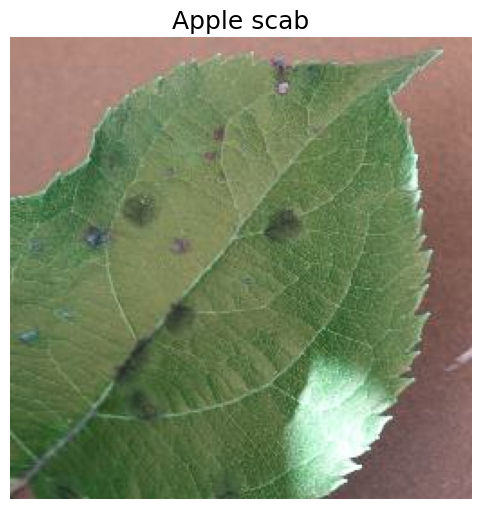

In [4]:
image = cv2.imread("../input/plantvillage-dataset/color/Apple___Apple_scab/01f3deaa-6143-4b6c-9c22-620a46d8be04___FREC_Scab 3112.JPG")
plt.figure(figsize = (6,6))
plt.imshow(image)
plt.title('Apple scab',size =18 )
plt.axis('off')
plt.show()

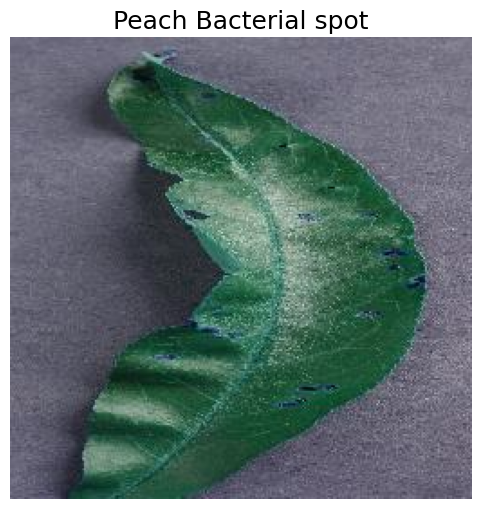

In [5]:
image = cv2.imread("../input/plantvillage-dataset/color/Peach___Bacterial_spot/00e6ad4a-5a62-48d7-ac68-9c0b8ec87f5f___Rut._Bact.S 1472.JPG")
plt.figure(figsize = (6,6))
plt.imshow(image)
plt.title('Peach Bacterial spot',size =18 )
plt.axis('off')
plt.show()

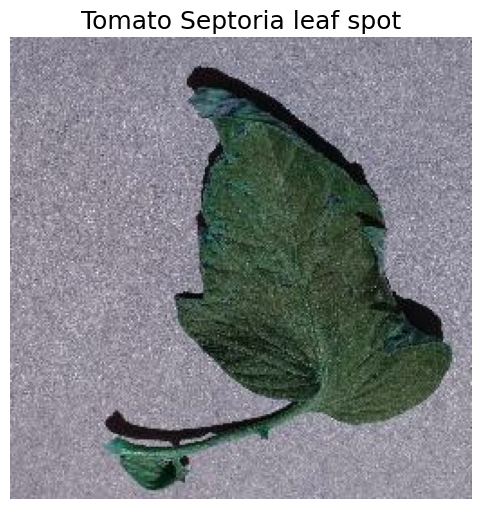

In [6]:
image = cv2.imread("../input/plantvillage-dataset/color/Tomato___Septoria_leaf_spot/015c2613-fb1c-4f31-88f1-c7e5be9ddc97___JR_Sept.L.S 8431.JPG")
plt.figure(figsize = (6,6))
plt.imshow(image)
plt.title('Tomato Septoria leaf spot',size =18 )
plt.axis('off')
plt.show()


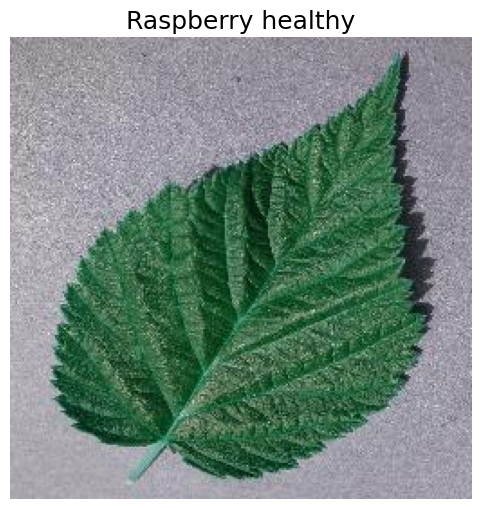

In [7]:
image = cv2.imread("../input/plantvillage-dataset/color/Raspberry___healthy/05f26de9-3f26-44f8-9ad4-cd83952399b3___Mary_HL 9140.JPG")

plt.figure(figsize = (6,6))
plt.imshow(image)
plt.title('Raspberry healthy',size =18 )
plt.axis('off')
plt.show()

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping


# Define the model
model = Sequential()

#  input shape
inputShape = (224, 224, 3)

# First Convolutional Block
model.add(Conv2D(32, (3, 3), padding="same", input_shape=inputShape,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))

# Second Convolutional Block
model.add(Conv2D(64, (3, 3), padding="same",activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding="same",activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))

# Third Convolutional Block
model.add(Conv2D(128, (3, 3), padding="same",activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding="same",activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(38,activation='softmax'))  

# define Early Stopping to optimize
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Print model summary
model.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 74, 74, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 74, 74, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 74, 74, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 74, 74, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     8,389,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        38,950 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,712,102 (33.23 MB)

 Trainable params: 8,709,222 (33.22 MB)

 Non-trainable params: 2,880 (11.25 KB)

In [9]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)
model.compile(
    optimizer = optimizer ,
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)


In [10]:
history= model.fit(train_ds,validation_data=validation_ds,epochs=20,callbacks=[early_stopping])

Epoch 1/20
   3/2376 ━━━━━━━━━━━━━━━━━━━━ 1:31 39ms/step - accuracy: 0.0556 - loss: 4.5023       

I0000 00:00:1715560857.271294     145 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1715560857.293511     145 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2376/2376 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5978 - loss: 1.5165

W0000 00:00:1715560933.541499     145 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715560934.585027     145 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2376/2376 ━━━━━━━━━━━━━━━━━━━━ 105s 37ms/step - accuracy: 0.5978 - loss: 1.5163 - val_accuracy: 0.7006 - val_loss: 1.1571
Epoch 2/20
2376/2376 ━━━━━━━━━━━━━━━━━━━━ 75s 32ms/step - accuracy: 0.7913 - loss: 0.7066 - val_accuracy: 0.8798 - val_loss: 0.3961
Epoch 3/20
2376/2376 ━━━━━━━━━━━━━━━━━━━━ 72s 30ms/step - accuracy: 0.8468 - loss: 0.5163 - val_accuracy: 0.7692 - val_loss: 0.8734
Epoch 4/20
2376/2376 ━━━━━━━━━━━━━━━━━━━━ 72s 30ms/step - accuracy: 0.8588 - loss: 0.4638 - val_accuracy: 0.4655 - val_loss: 2.8300
Epoch 5/20
2376/2376 ━━━━━━━━━━━━━━━━━━━━ 72s 30ms/step - accuracy: 0.8585 - loss: 0.4735 - val_accuracy: 0.9475 - val_loss: 0.1950
Epoch 6/20
2376/2376 ━━━━━━━━━━━━━━━━━━━━ 75s 31ms/step - accuracy: 0.9108 - loss: 0.2824 - val_accuracy: 0.3185 - val_loss: 10.2047
Epoch 7/20
2376/2376 ━━━━━━━━━━━━━━━━━━━━ 72s 30ms/step - accuracy: 0.9037 - loss: 0.3229 - val_accuracy: 0.9047 - val_loss: 0.3500
Epoch 8/20
2376/2376 ━━━━━━━━━━━━━━━━━━━━ 72s 30ms/step - accuracy: 0.9242 - loss: 0.

In [11]:
model.evaluate(validation_ds)


683/683 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9896 - loss: 0.0400


[0.03790220618247986, 0.9903001189231873]

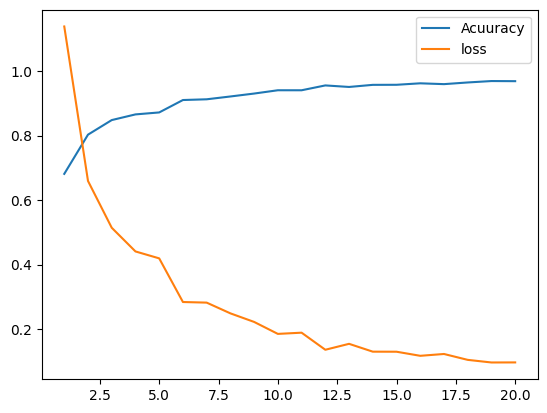

In [12]:
accuracy = history.history['accuracy']
loss = history.history['loss']
epochs = range(1,21)

plt.plot(epochs , accuracy , label = 'Acuuracy')
plt.plot(epochs , loss , label = 'loss')
plt.legend()
plt.show()

In [13]:
def img_to_pred(image):
  image = image.numpy()
  image = tf.expand_dims(image,0)
  return image

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


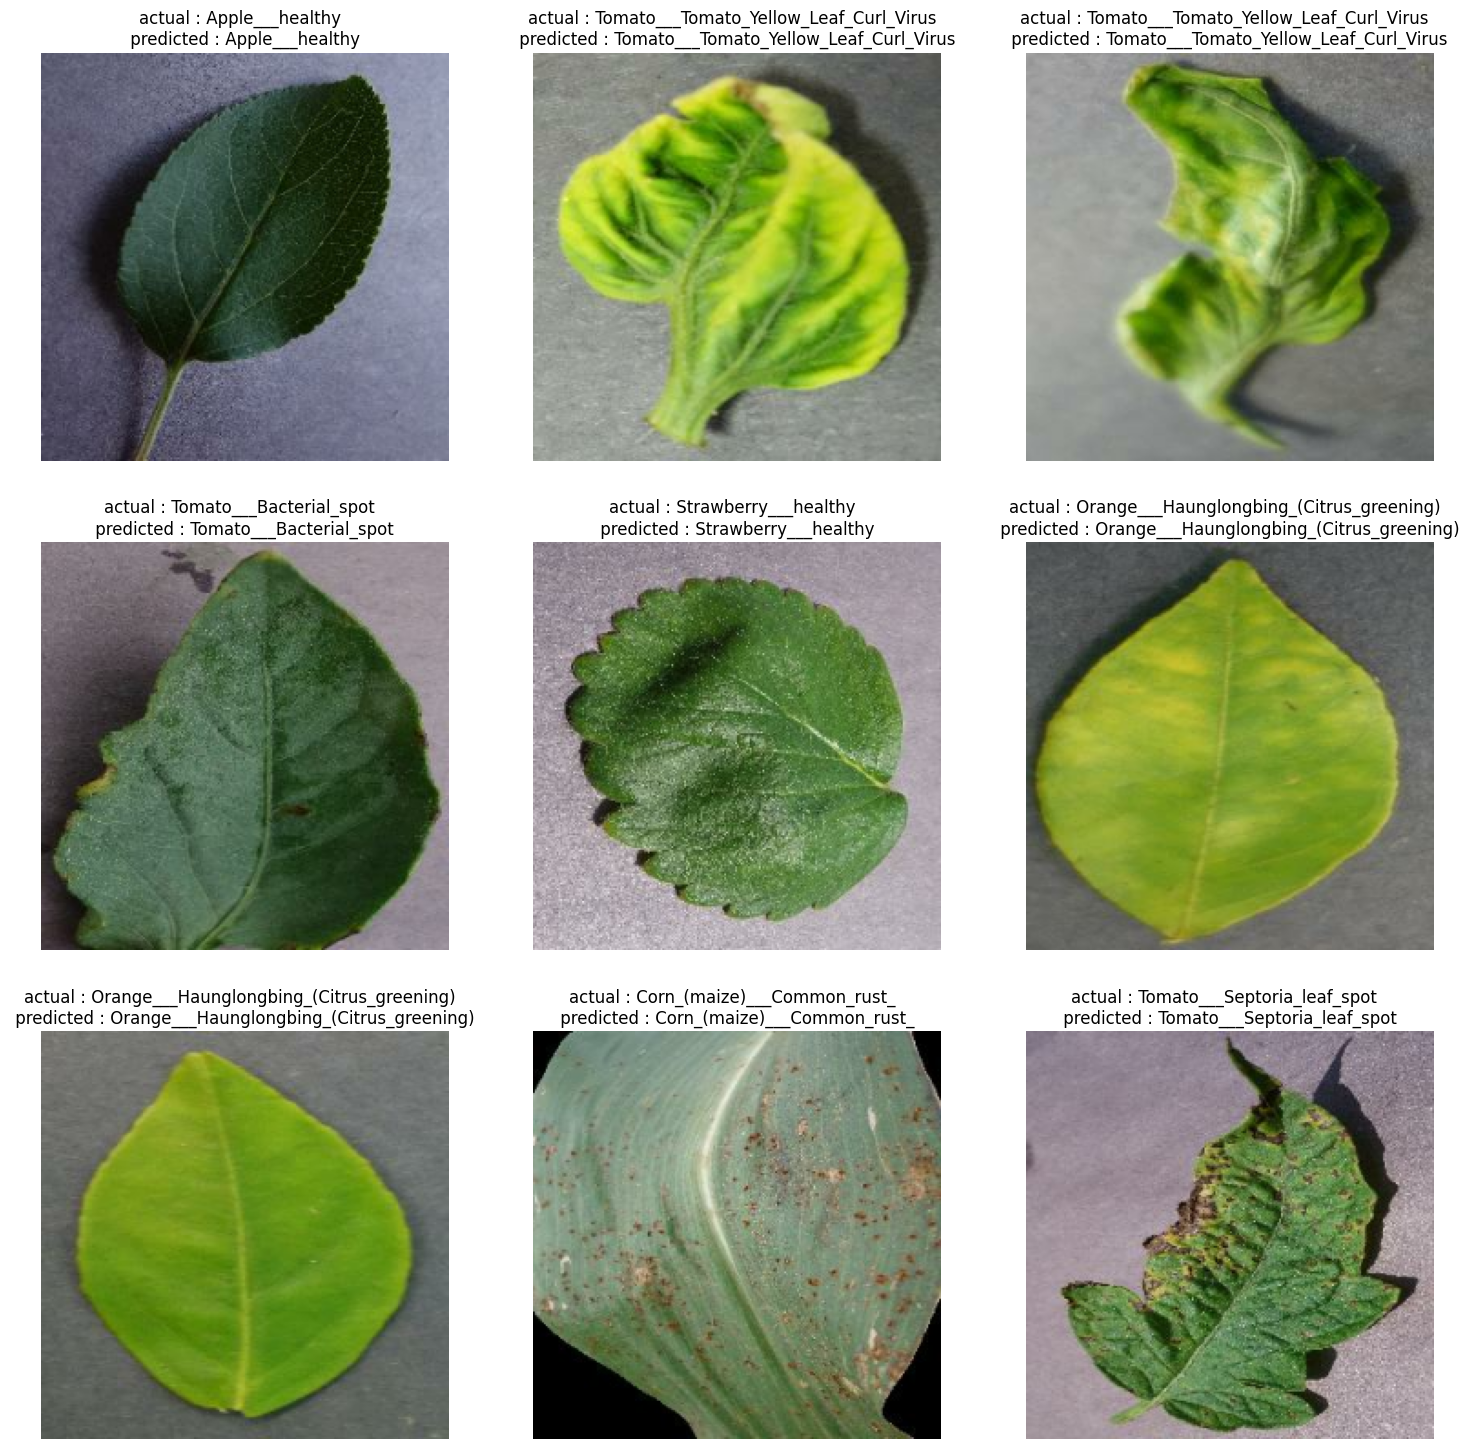

In [14]:
import numpy as np
plt.figure(figsize=(18,18))
for images, labels in test_ds.take(2) : # take the first patch
  for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(images[i].numpy().astype('uint32'))
    plt.axis('off')
    actual = classes[labels[i]]
    predict =classes[np.argmax( model.predict(img_to_pred(images[i])))]
    plt.title(f"actual : {actual}  \n predicted : {predict} ")